In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from hdbscan import HDBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
eat = ['Eat', 'Eat_Breakfast', 'Eat_Lunch', 'Eat_Dinner']
sleep = ['Sleep']
med = ['Morning_Meds', 'Evening_Meds', 'Medicine','Take_Medicine']
A = {'Eat': eat,  'Sleep': sleep, 'Medicine': med}

In [8]:
def toStartDuration(A):
    X = []
    Y = []
    for i in range(len(A)):
        X.append(A[i][0])
        Y.append(A[i][1])
    return X, Y

def processData(df):
    data = df[['Start_Time', 'Duration']]
    data = data.values.astype('float32', copy=False)
    return data

def scaleData(data):
    scaler = StandardScaler().fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

def hdbscan(df, r, mp):
    data = processData(df)
    X = scaleData(data)
   
    model = HDBSCAN(min_cluster_size=r, min_samples=mp, metric='euclidean').fit(X)

    if -1 in set(model.labels_):
        clusters = len(set(model.labels_)) -1
    else:
        clusters = len(set(model.labels_))

    A = []
    for i in range(clusters):
        a = data[model.labels_ == i]
        A.append(a)
    return A

In [12]:
def frequency_chart(dataset, data_type):
    dirc = r'..\CASAS_DATA\HH' + dataset + r'\\' + data_type
    Day_end = len(os.listdir(dirc))
    Day_start = 1
    
    S, E, M, D = [], [], [], []
    
    fig, (s, m, e) = plt.subplots(1, 3)
    fig.set_figwidth(18)
    fig.set_figheight(5)
    fig.suptitle('Frequency of Activities in '+ dataset, fontsize=20)
    
    #sleep
    for day in range(Day_start, Day_end+1):
        read_path = r'..\CASAS_DATA\HH' + dataset + '\\' + data_type + '\Day' + str(day) + r'.csv'

        day_df = pd.read_csv(read_path)
        eat_df = day_df[day_df['Activity'].isin(eat)]
        sleep_df = day_df[day_df['Activity'].isin(sleep)]
        med_df = day_df[day_df['Activity'].isin(med)]
        
        S.append(len(sleep_df))
        M.append(len(med_df))
        E.append(len(eat_df))
        D.append(day)
        
    s.plot(D, S, marker = 's', mfc = 'r', mec = 'r')
    s.set_title('Sleep')
    s.set_xlabel('Days')
    s.set_ylabel('Frequency')
    
    e.plot(D, E, marker = 's', mfc = 'r', mec = 'r')
    e.set_title('Eat')
    e.set_xlabel('Days')
    e.set_ylabel('Frequency')
    
    m.plot(D, M, marker = 's', mfc = 'r', mec = 'r')
    m.set_title('Medicine')
    m.set_xlabel('Days')
    m.set_ylabel('Frequency')
    
def getXY(dataset, activity):
    readpath = r'..\CASAS_DATA\HH' + dataset + '\Filled_Activites\\' + activity + '.csv'
    act_df = pd.read_csv(readpath)
    X = act_df['Start_Time']
    Y = act_df['Duration']
    return X, Y
    
def clustering(dataset):
    fig, aplot = plt.subplots(1, 3)
    fig.set_figwidth(18)
    fig.set_figheight(5)
    fig.suptitle('Scattering of Activities in '+ dataset, fontsize=20)
    
    ax = 0
    for act in A:
        X, Y = getXY(dataset, act)
        aplot[ax].scatter(X, Y)
        aplot[ax].set_title(act)
        aplot[ax].set_xlabel('Start Time')
        aplot[ax].set_ylabel('Duration')
        ax += 1
        
    
    
    

In [13]:
min_smp = {'Sleep': 3, 'Eat': 4, 'Medicine': 4}
min_pts =  {'Sleep': 10, 'Eat': 10, 'Medicine': 10}

def plot_clusters(dataset):
    fig, aplot = plt.subplots(1, 3)
    fig.set_figwidth(18)
    fig.set_figheight(5)
    fig.suptitle('HDBSCAN of Activities in '+ dataset, fontsize=20)
    
    ax = 0
    for act in A:
        act_df = pd.read_csv(r'..\CASAS_DATA\HH' + dataset + '\Filled_Activites\\' + act + '.csv')
        C = hdbscan(act_df, min_pts[act] ,min_smp[act])
        
        for c in C:
            x, y = toStartDuration(c)
            aplot[ax].scatter(x, y)
            aplot[ax].set_title(act)
            aplot[ax].set_ylabel('Duration')
            aplot[ax].set_xlabel('Start Time')
        ax += 1
        
      

<ipython-input-13-9163fdbc357f>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, aplot = plt.subplots(1, 3)


Error in Frequency chart of 112


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

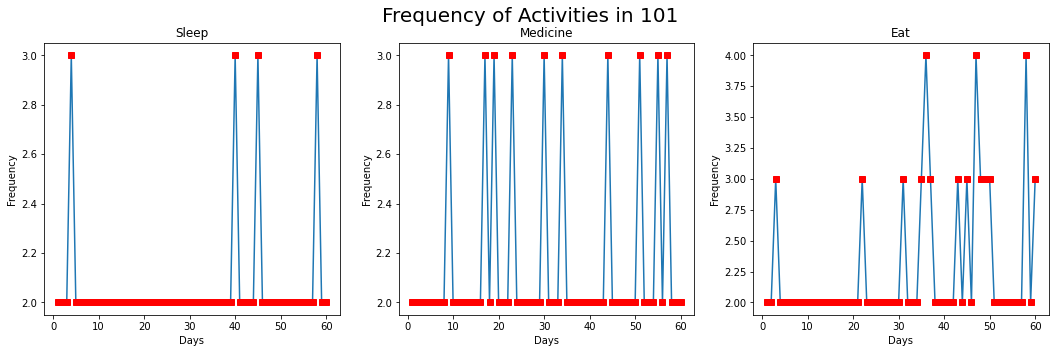

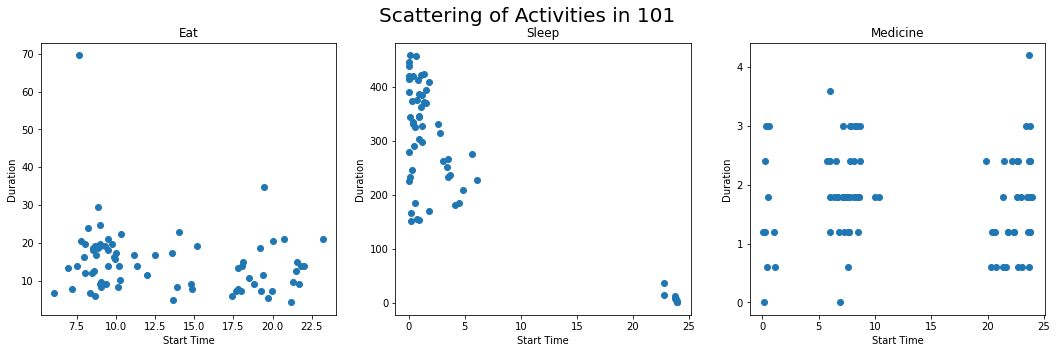

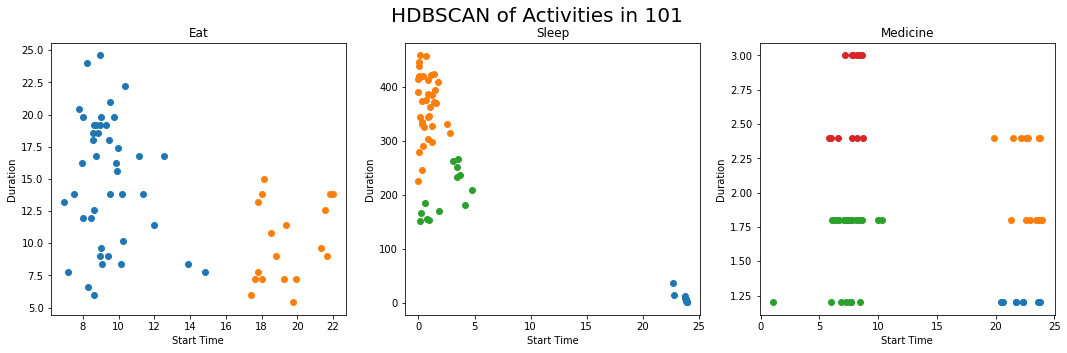

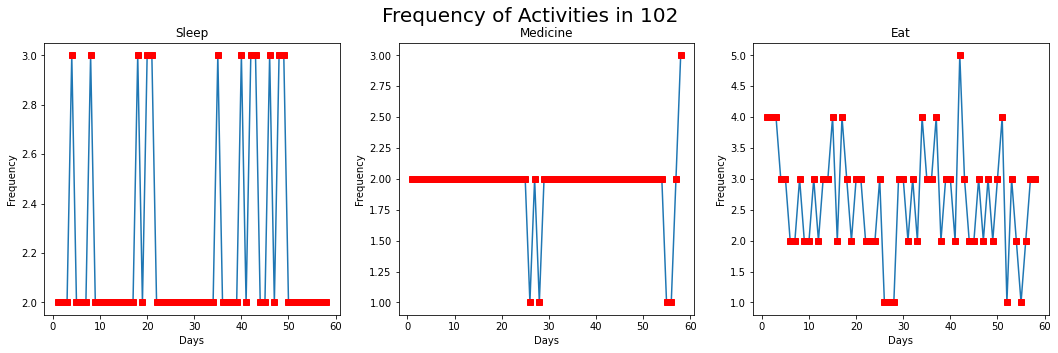

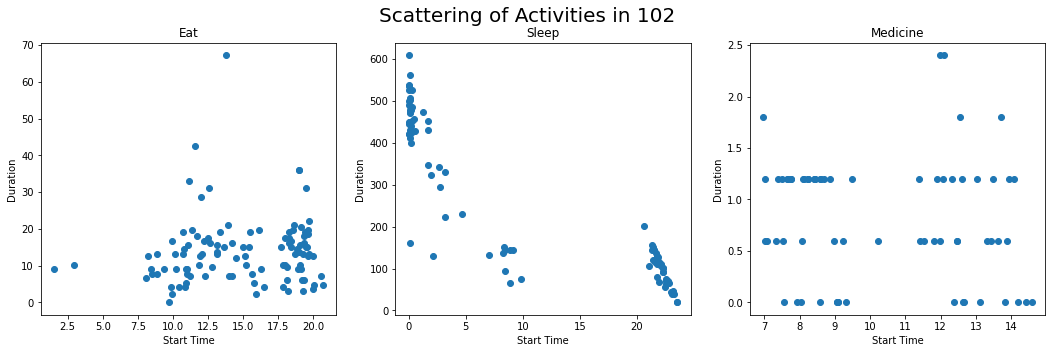

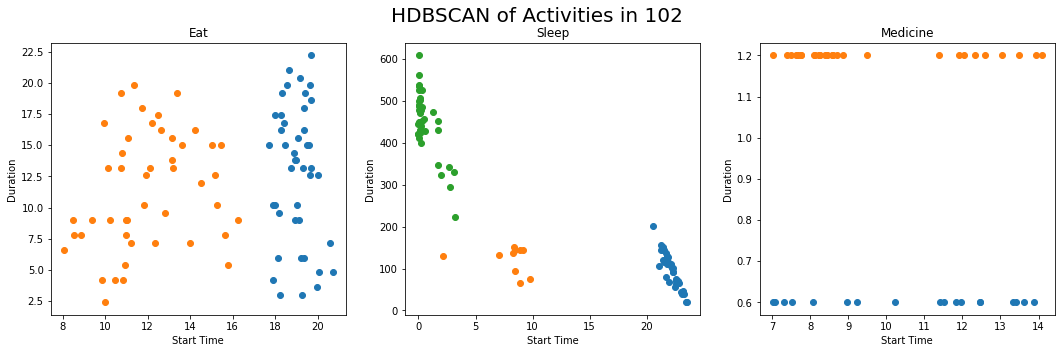

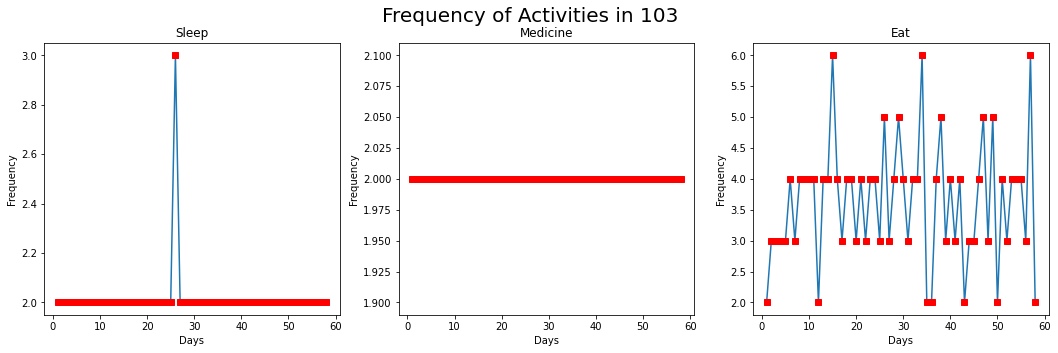

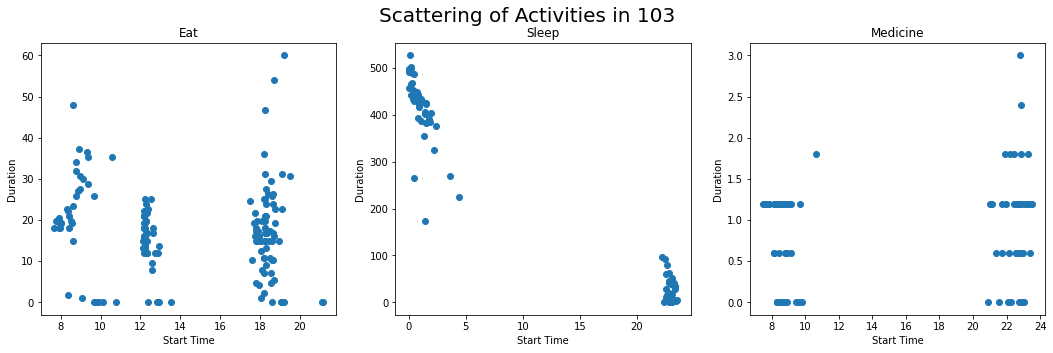

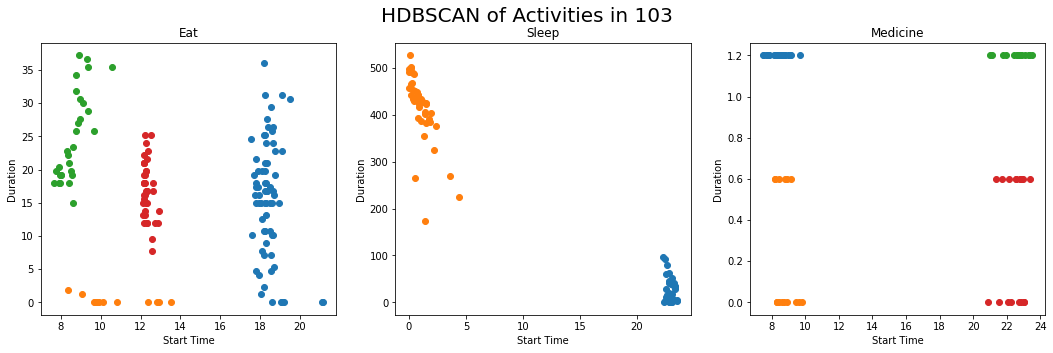

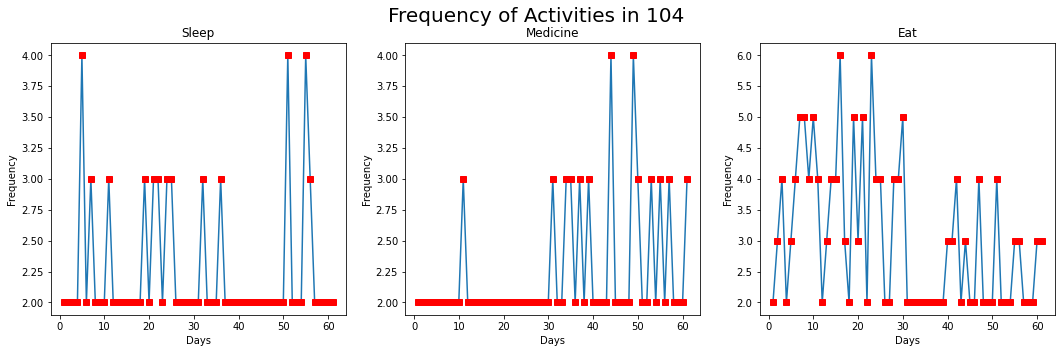

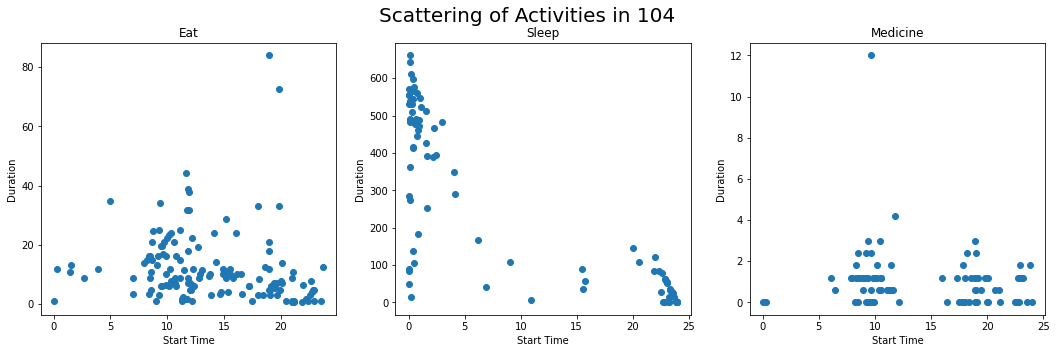

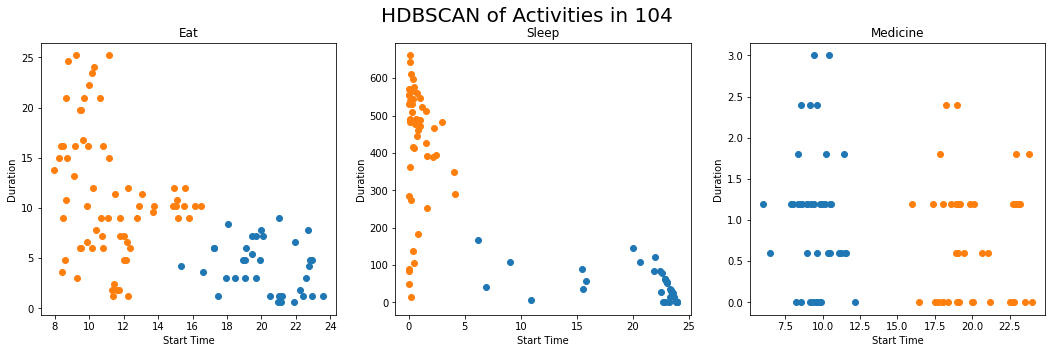

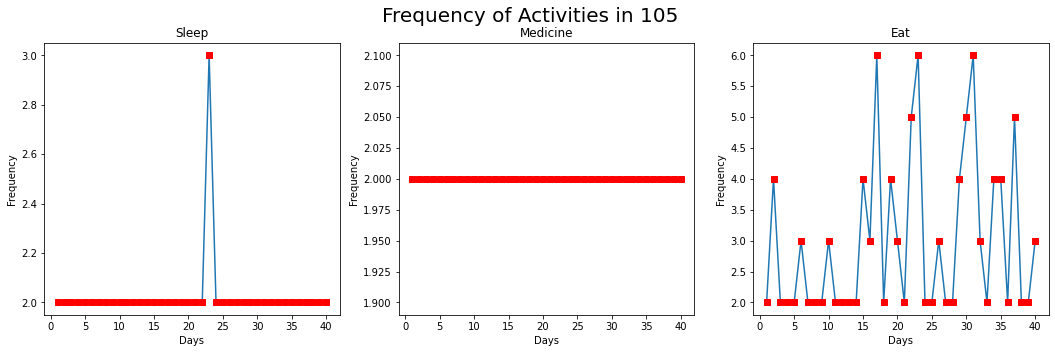

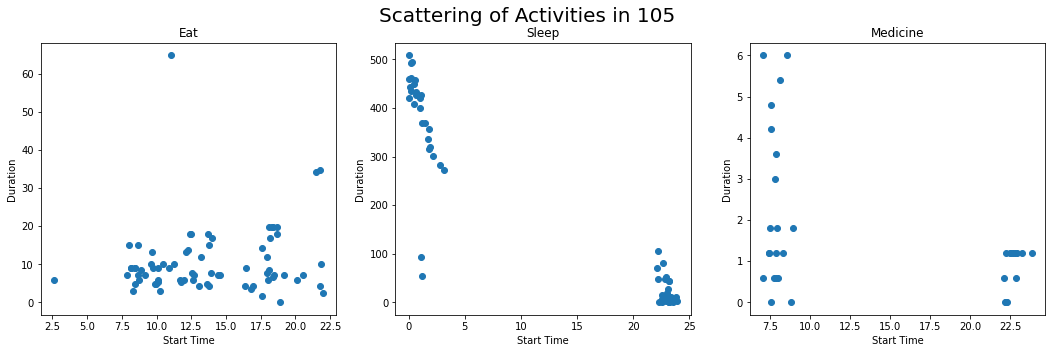

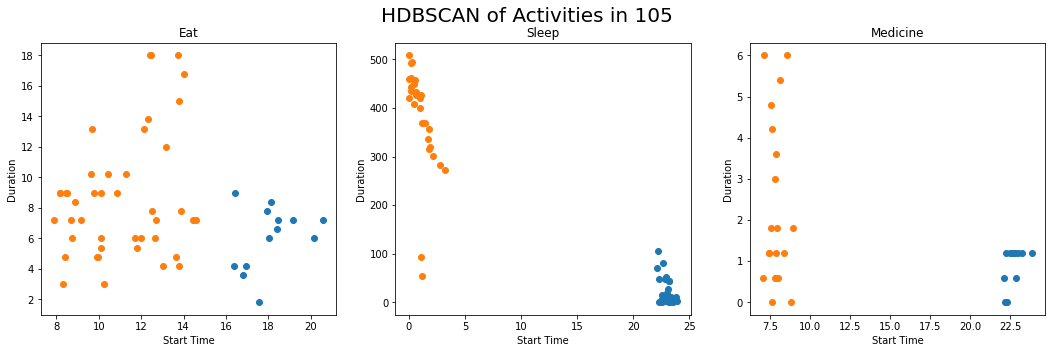

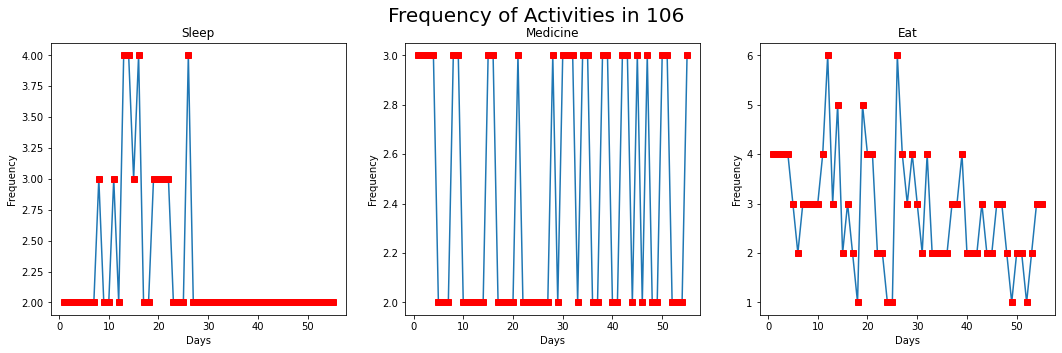

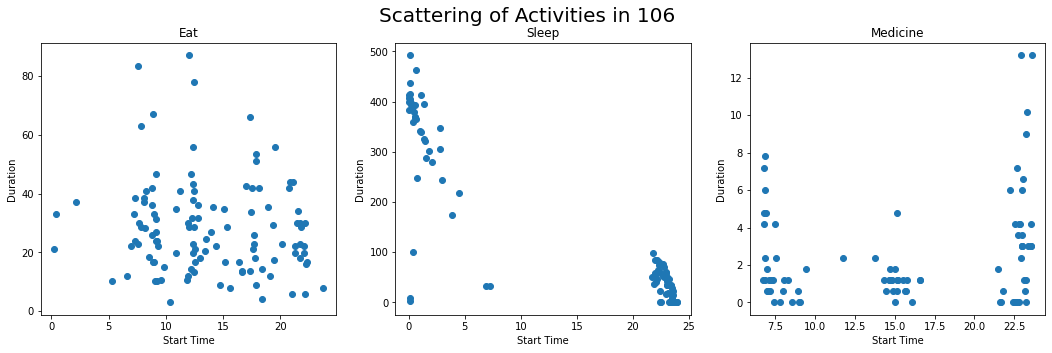

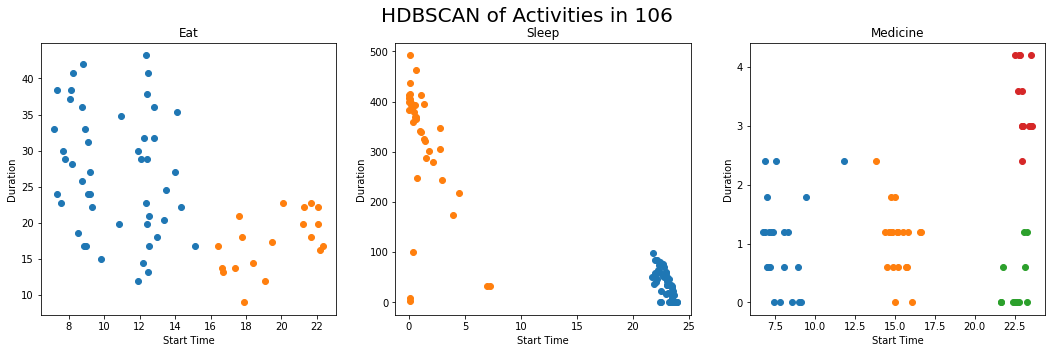

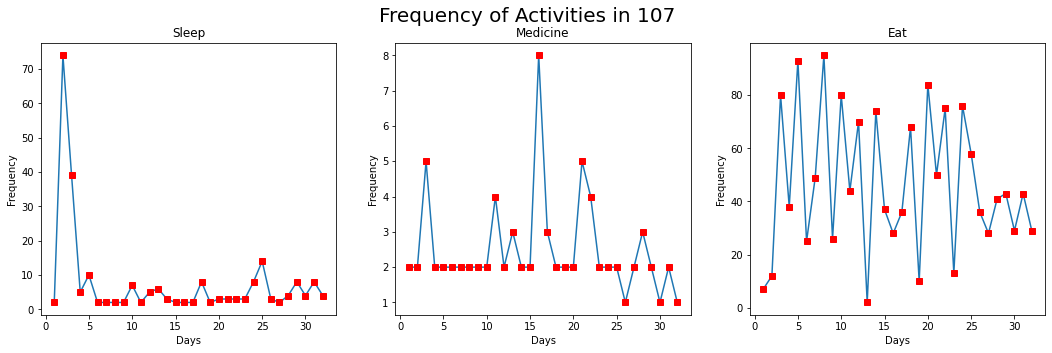

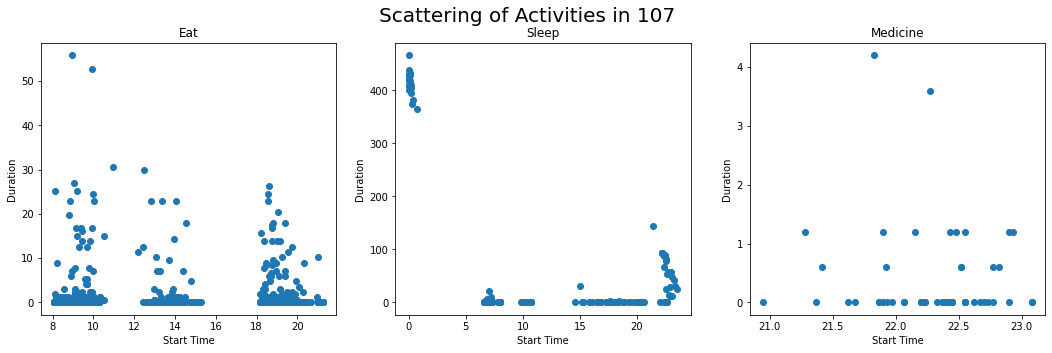

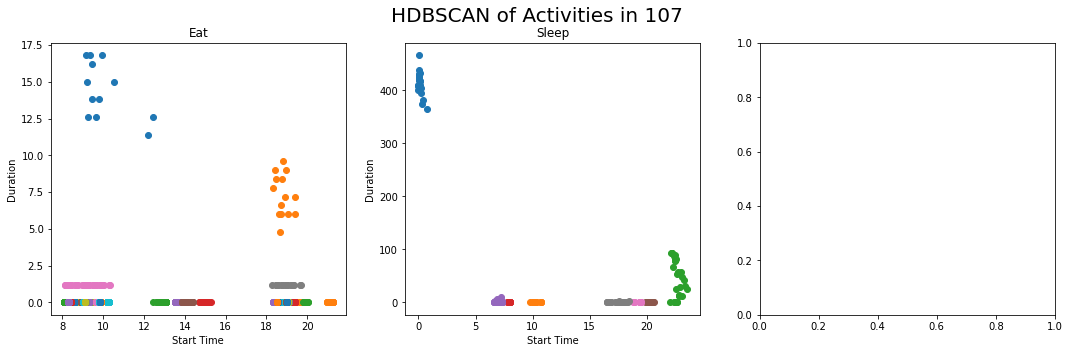

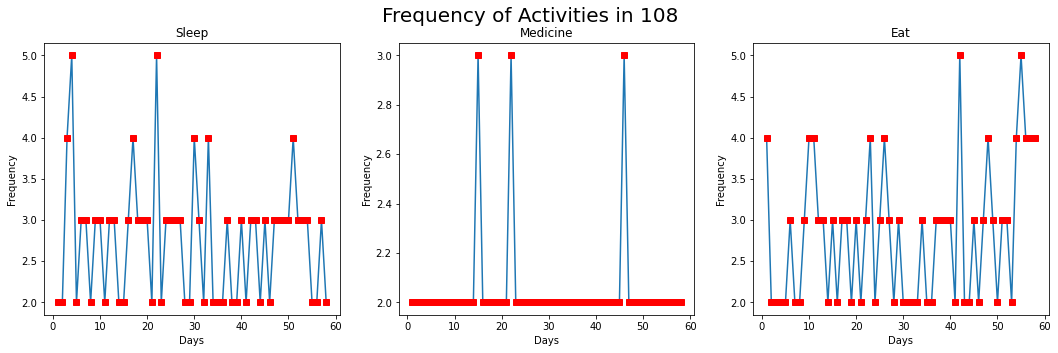

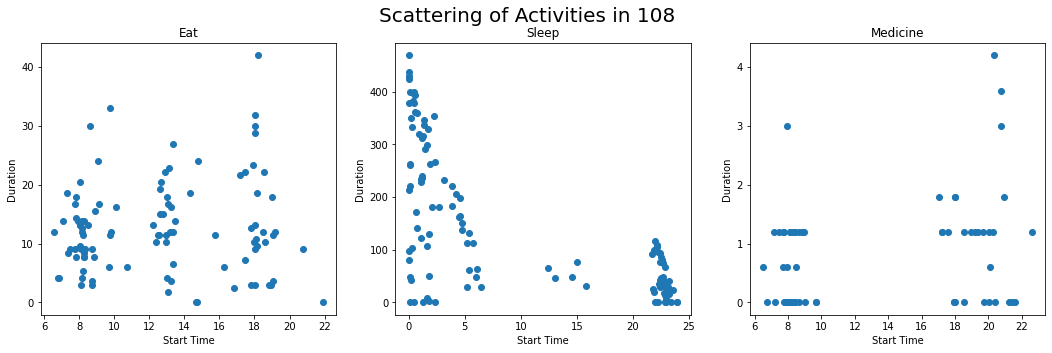

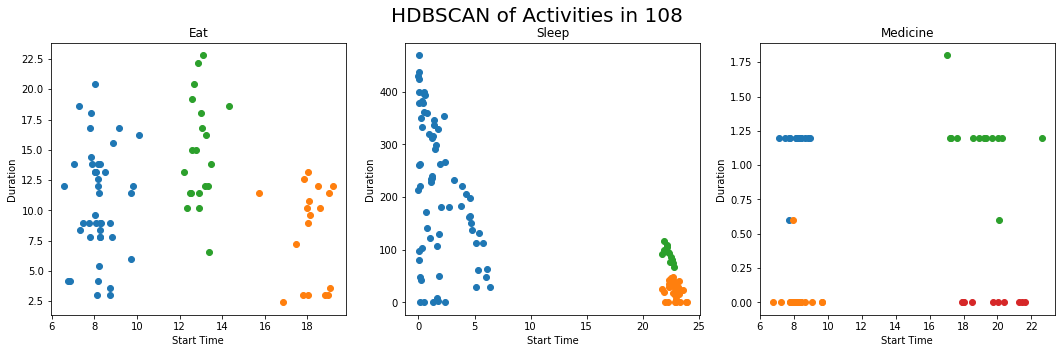

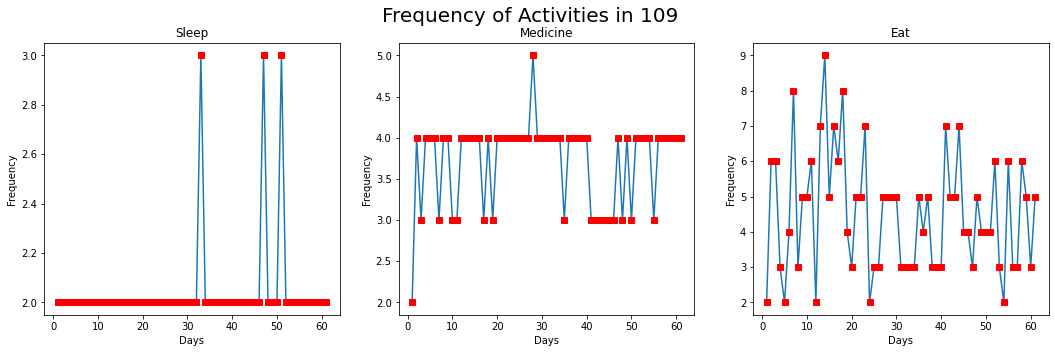

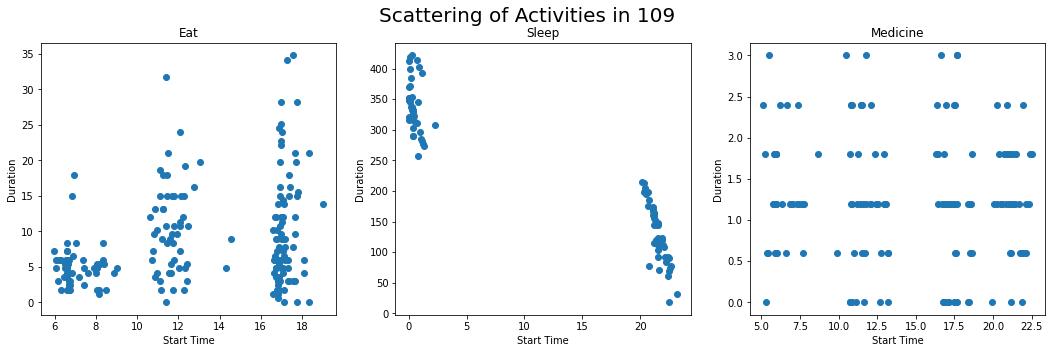

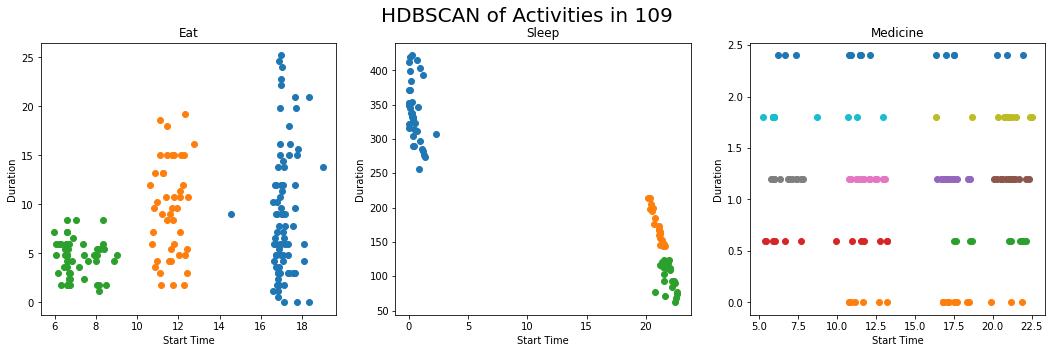

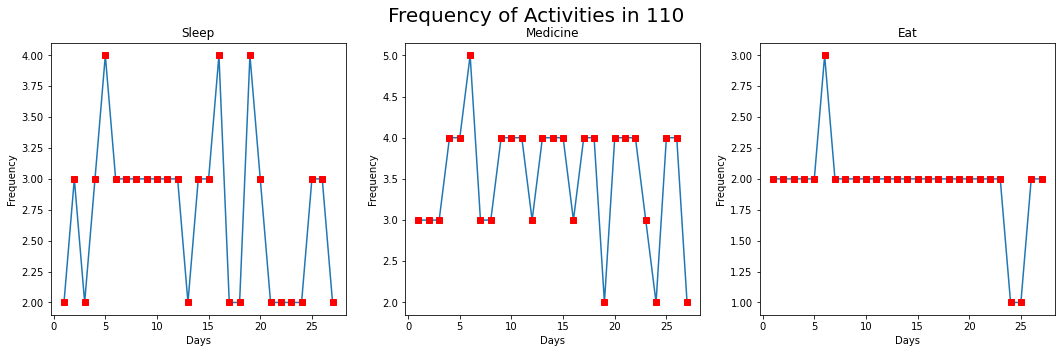

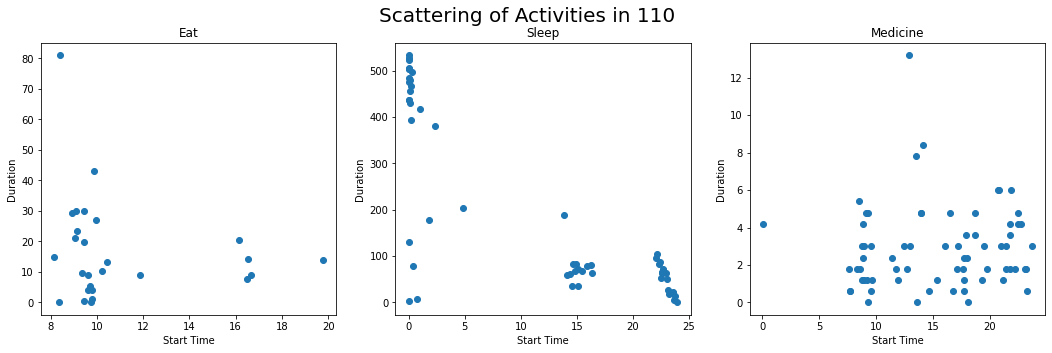

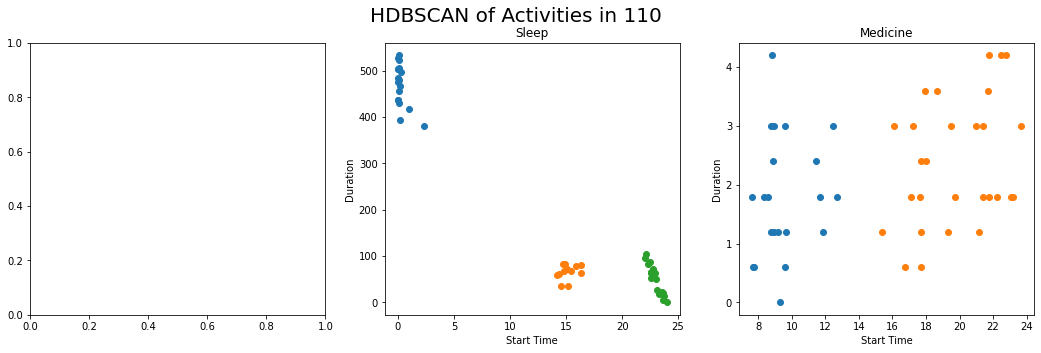

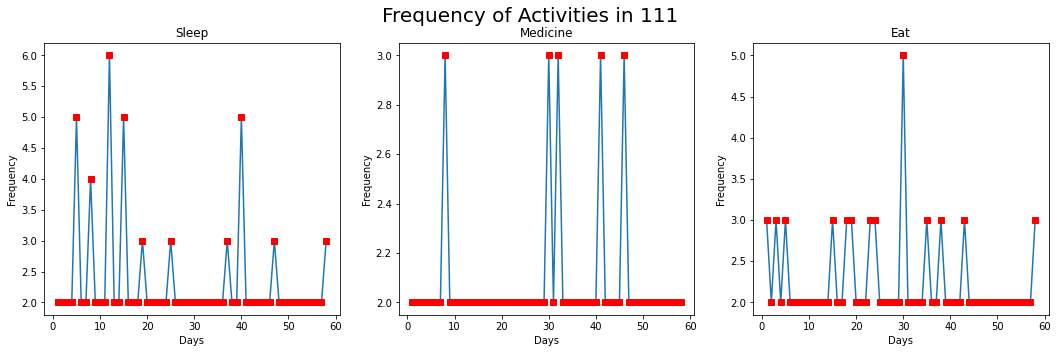

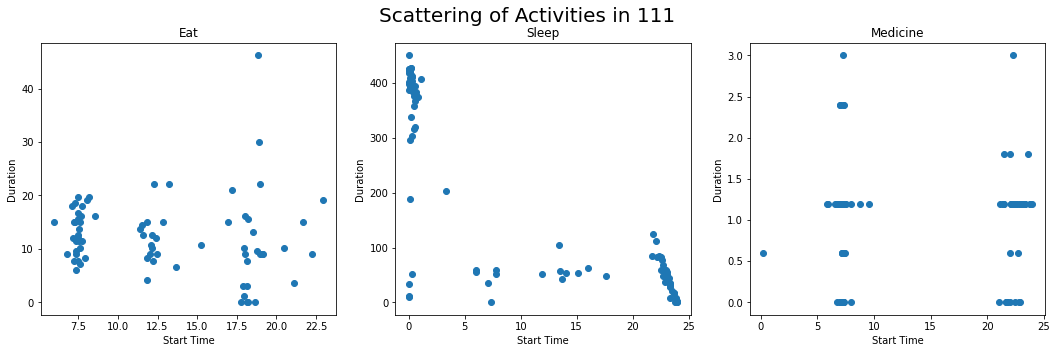

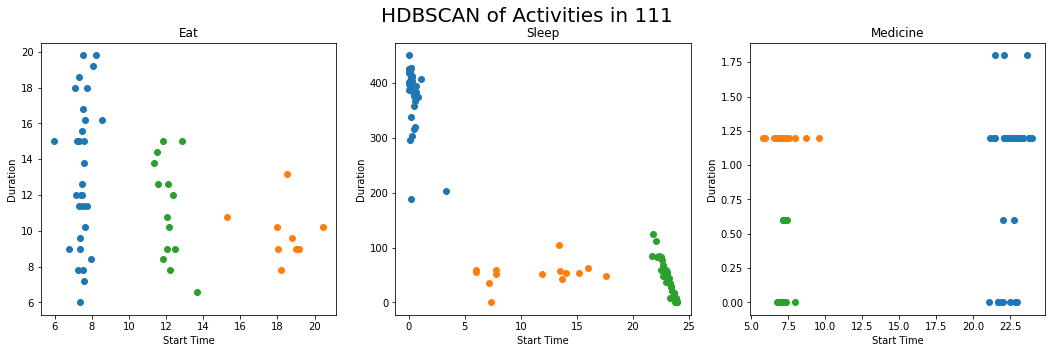

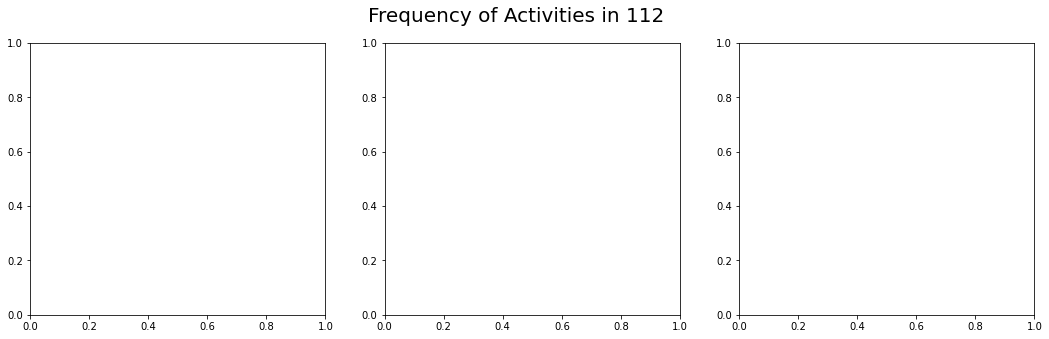

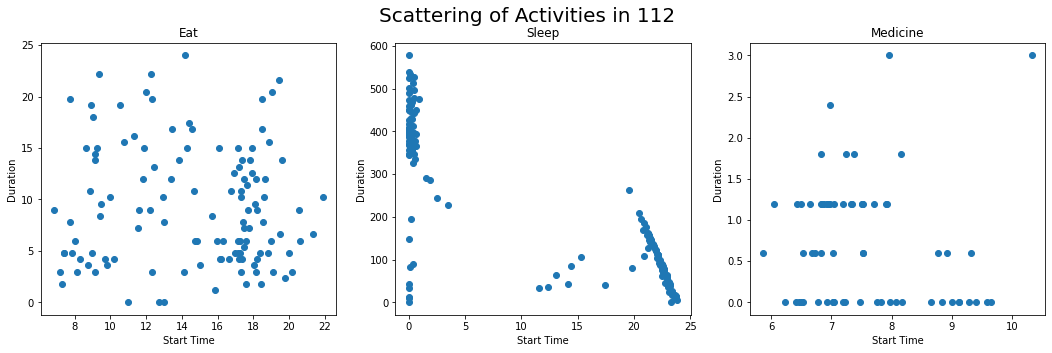

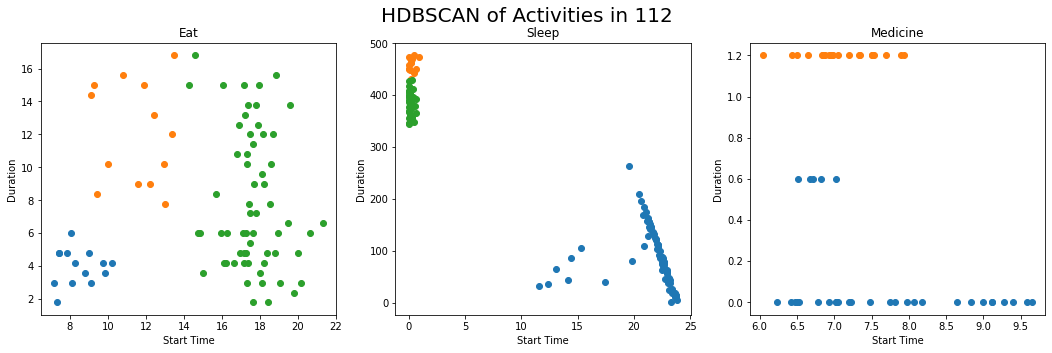

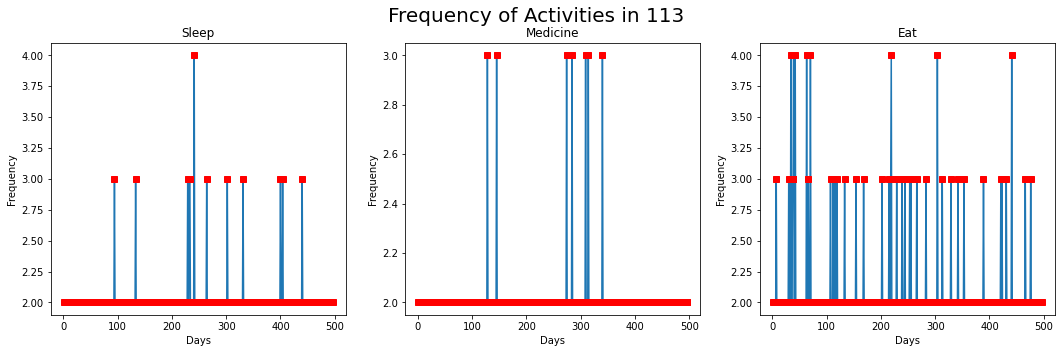

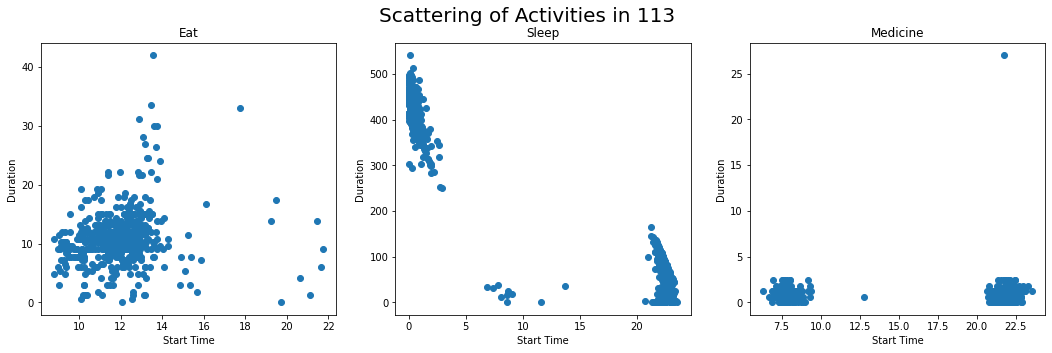

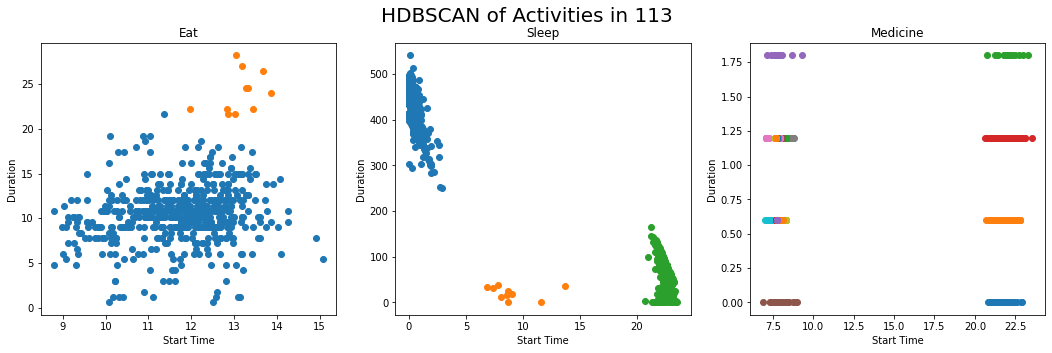

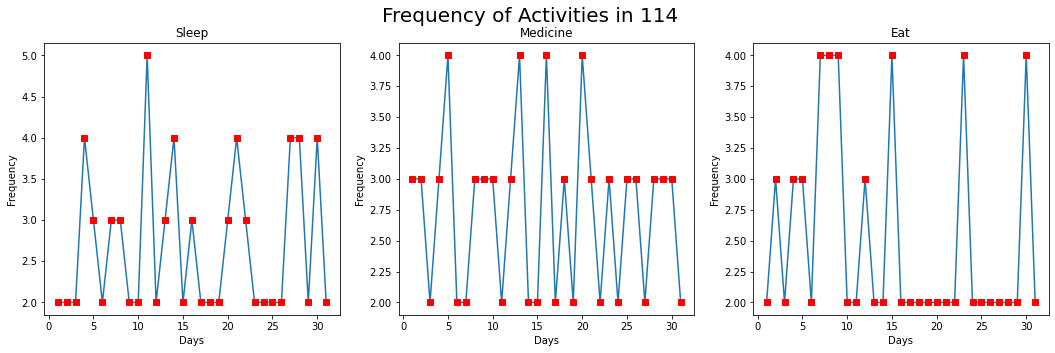

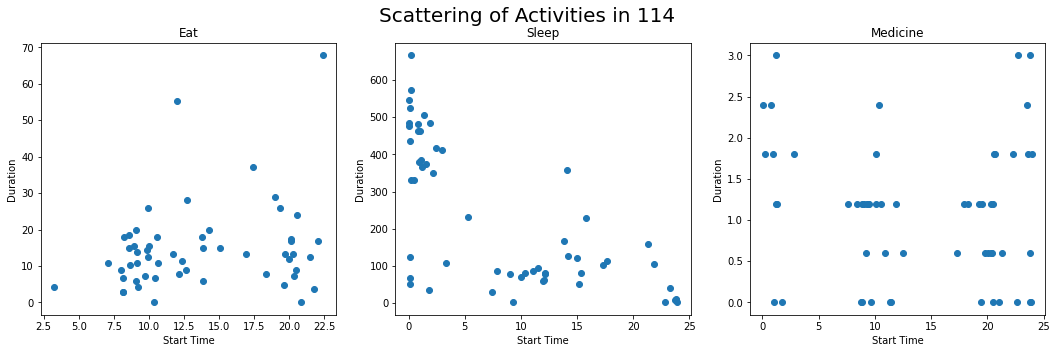

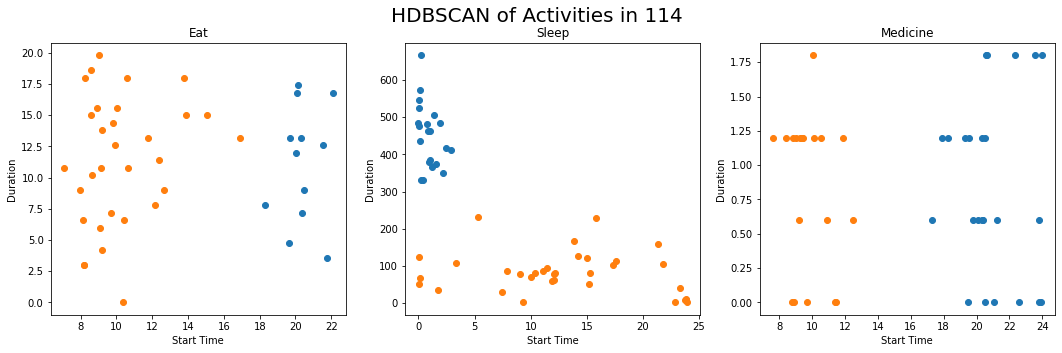

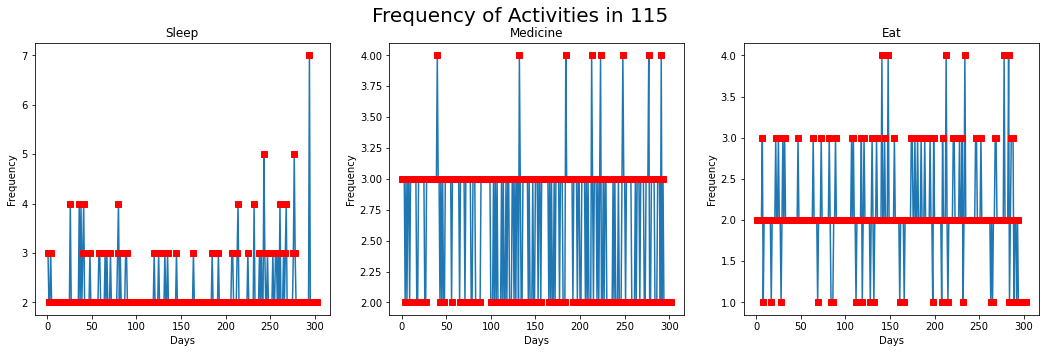

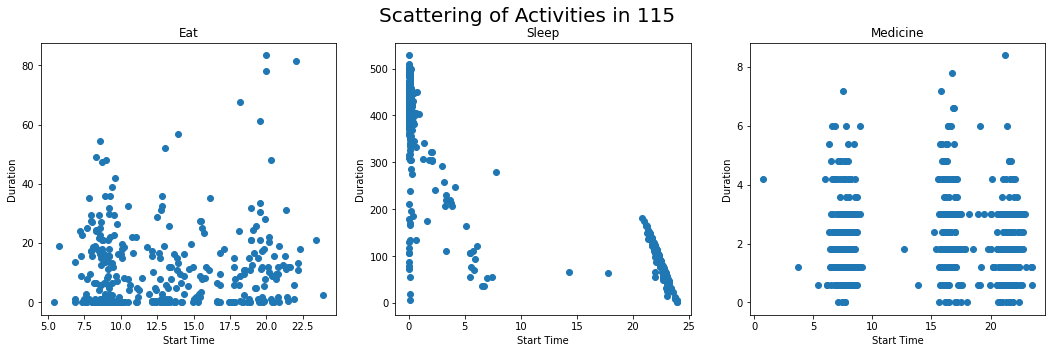

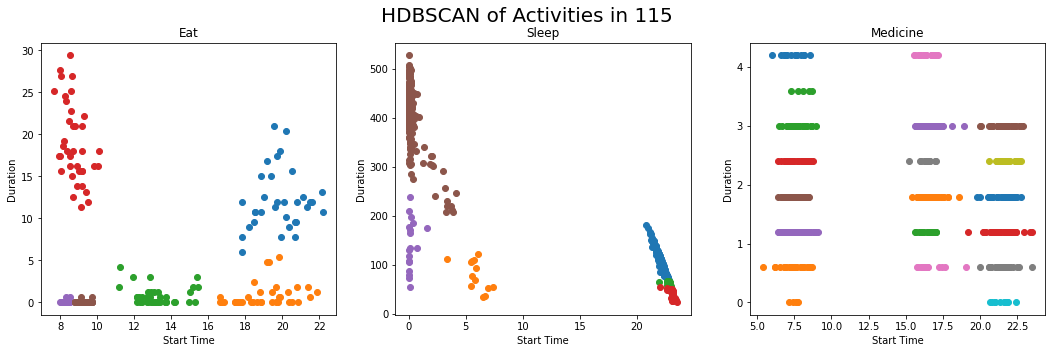

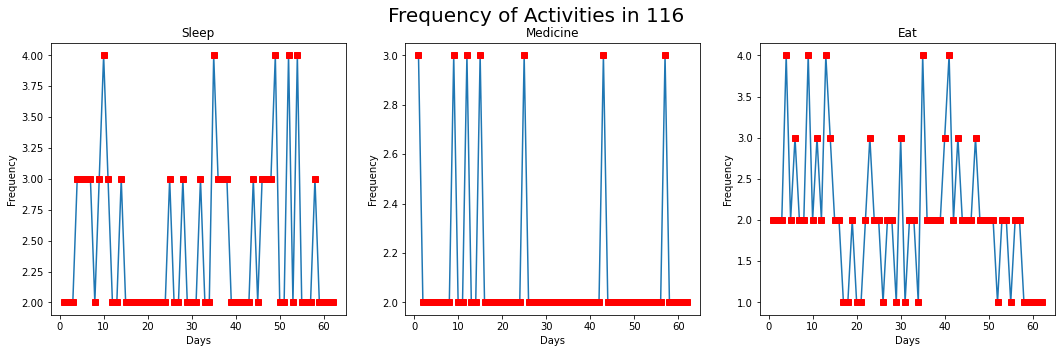

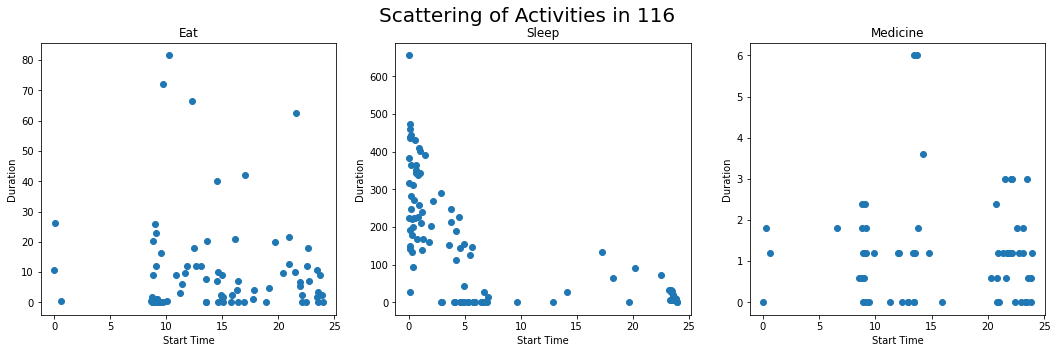

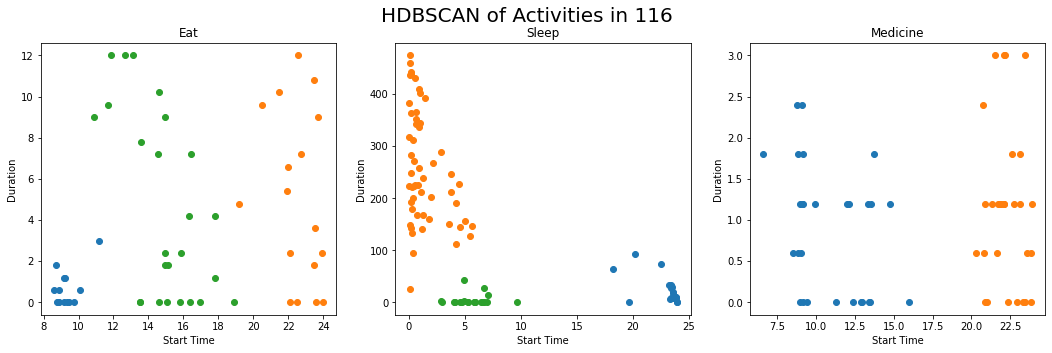

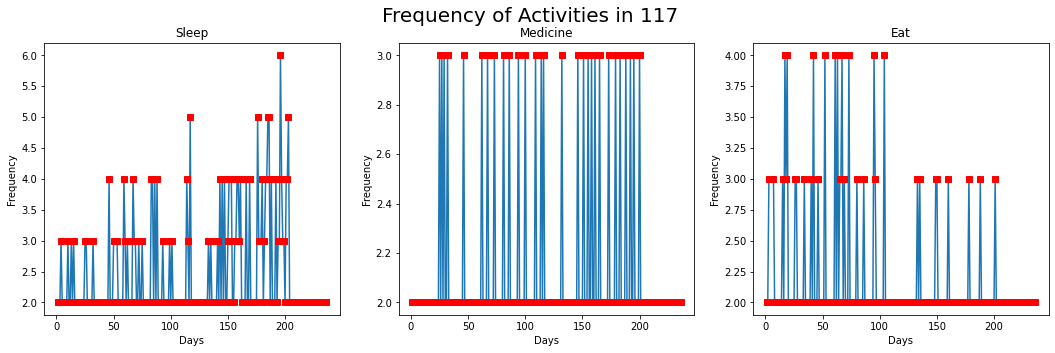

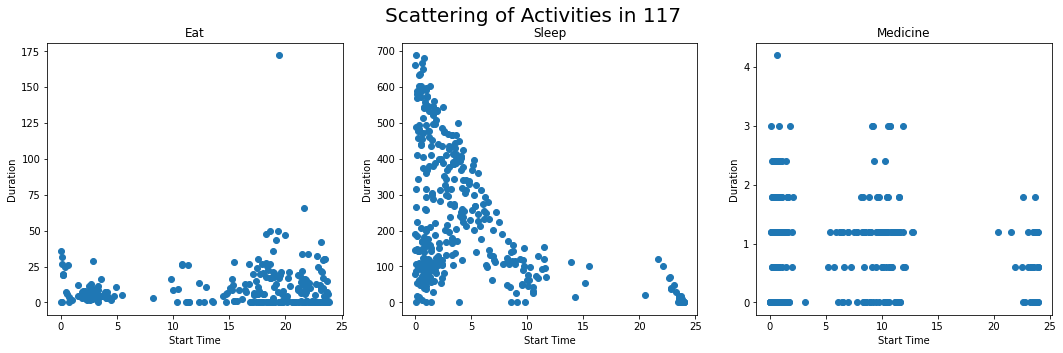

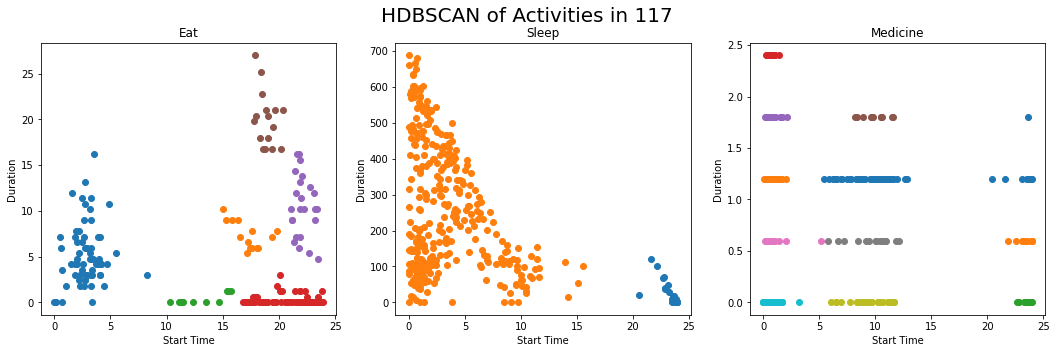

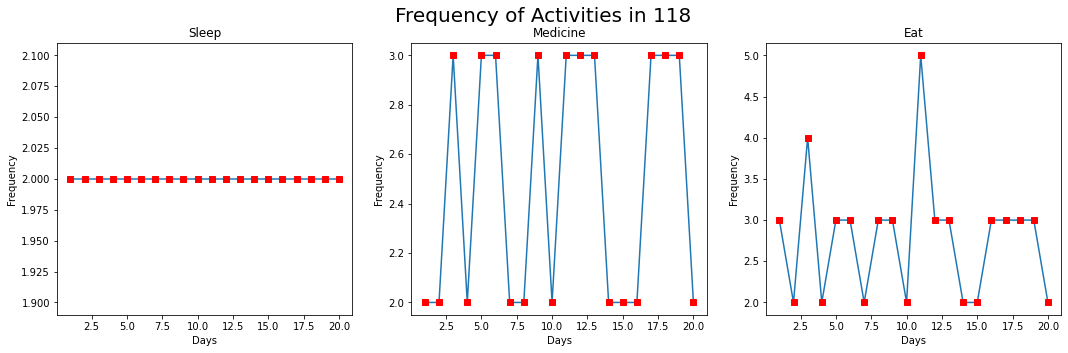

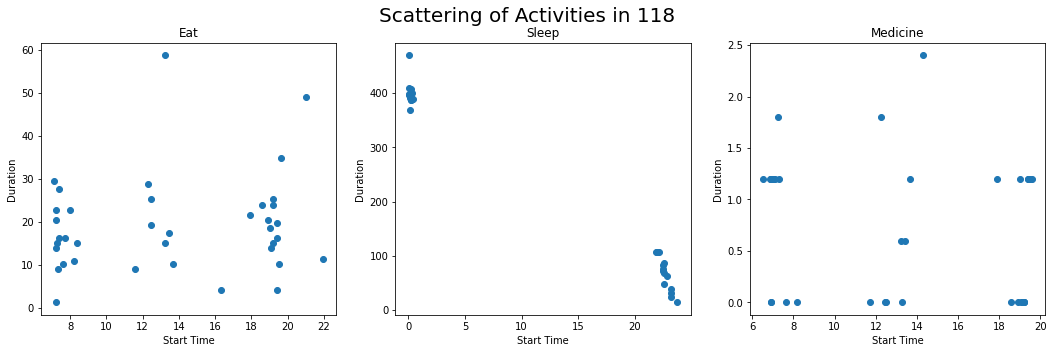

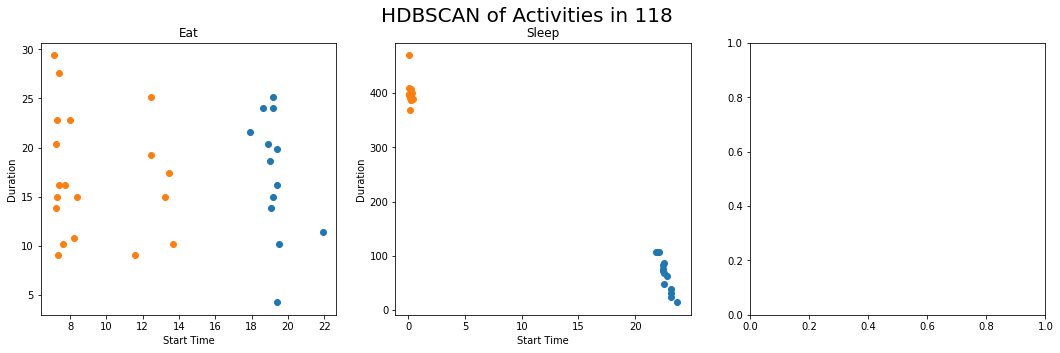

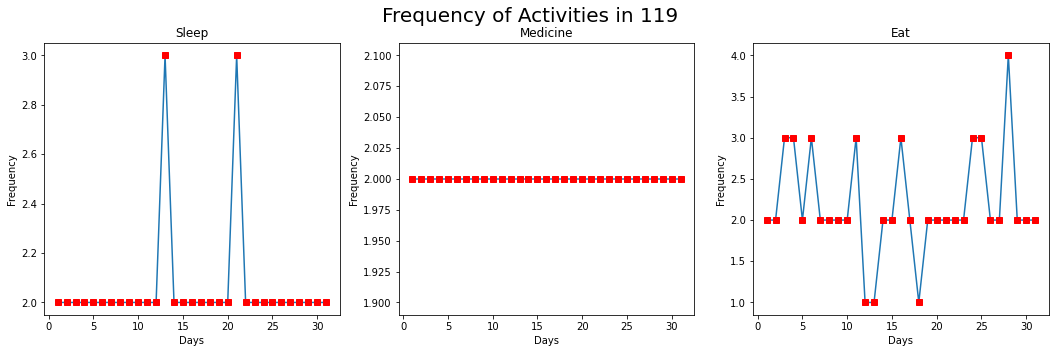

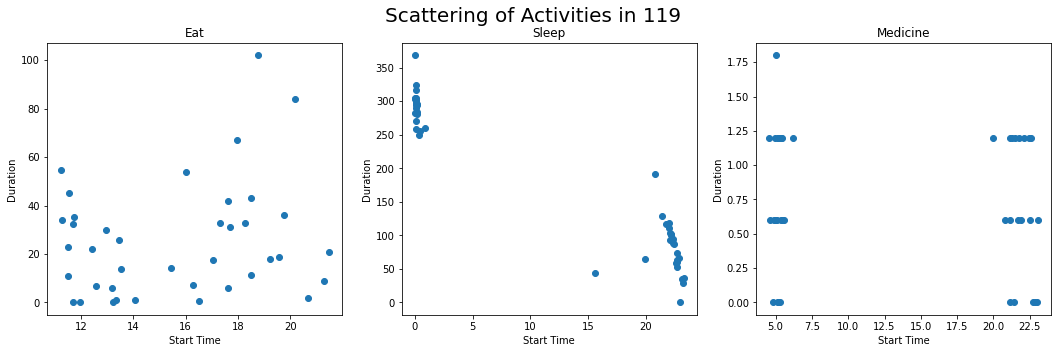

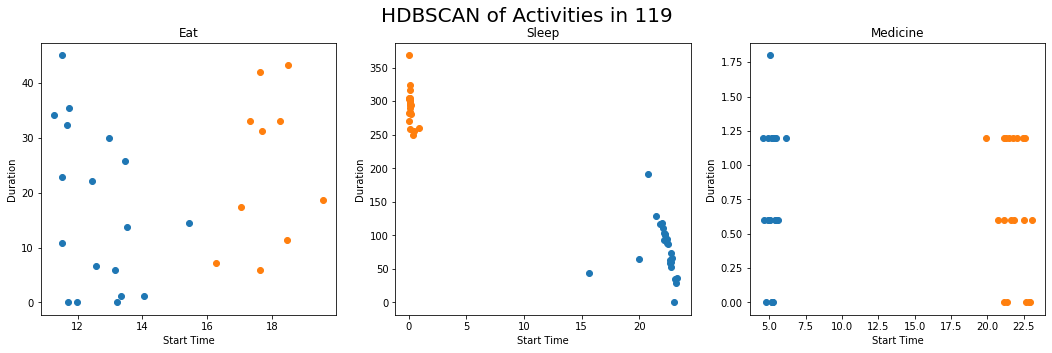

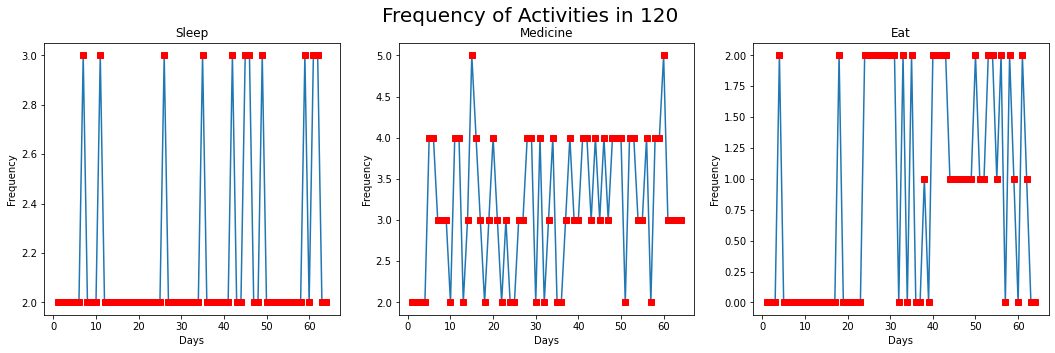

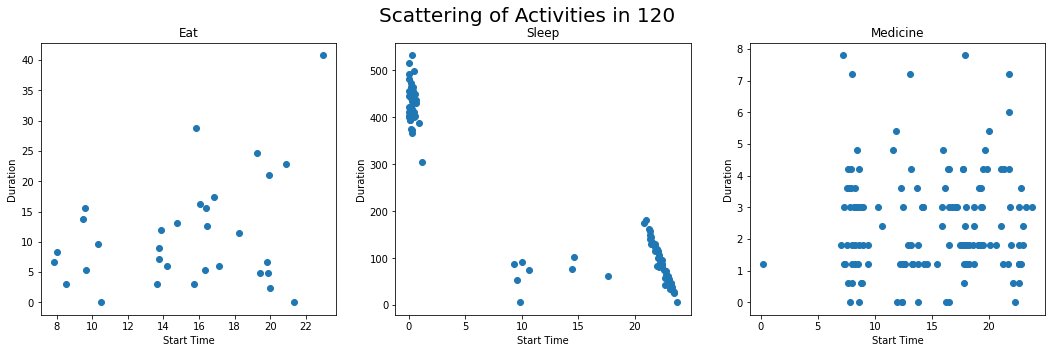

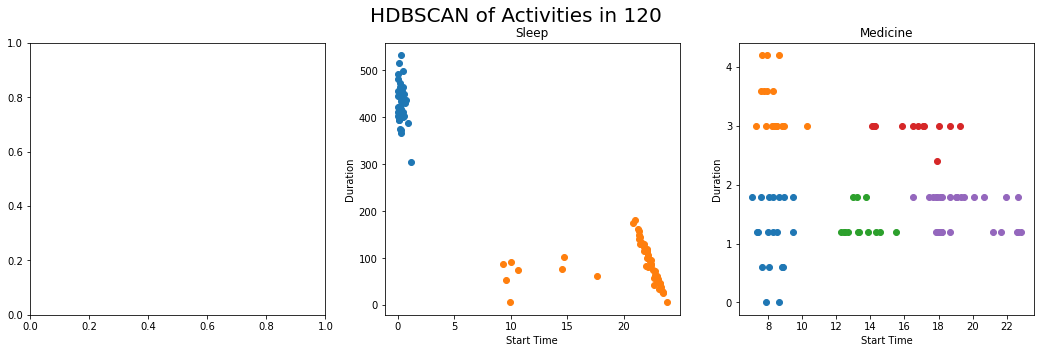

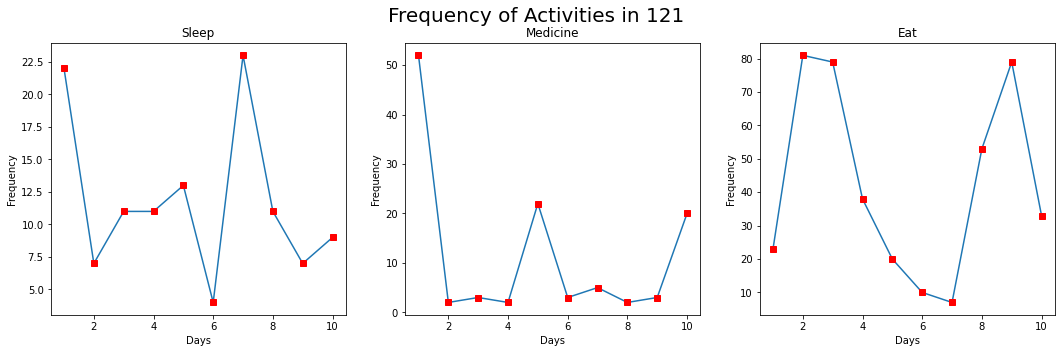

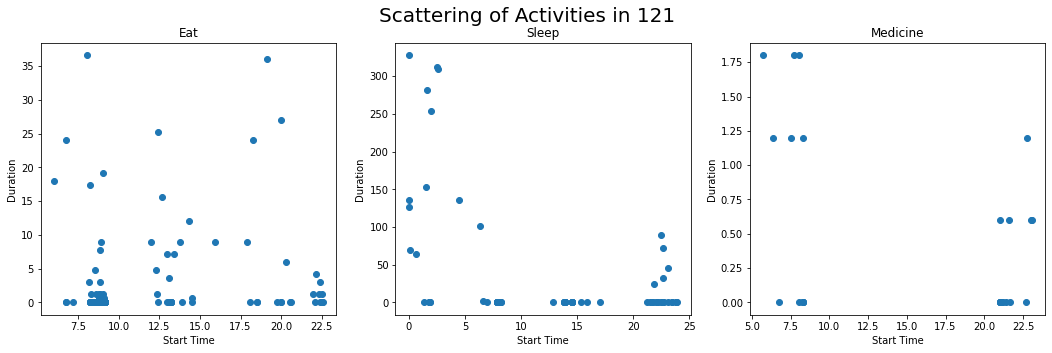

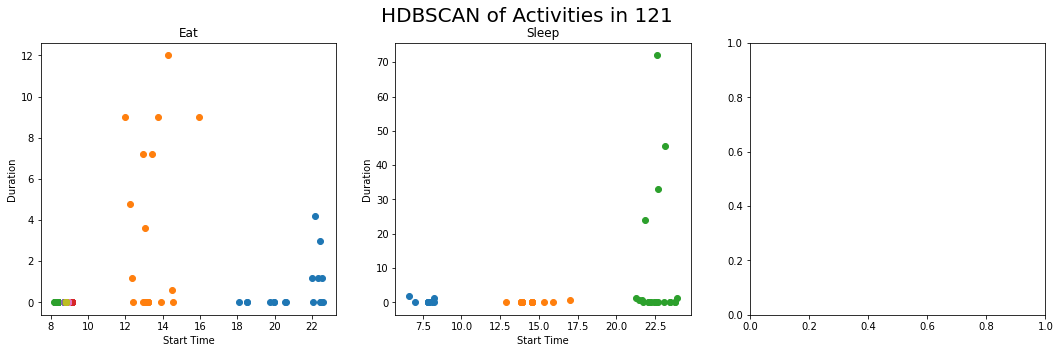

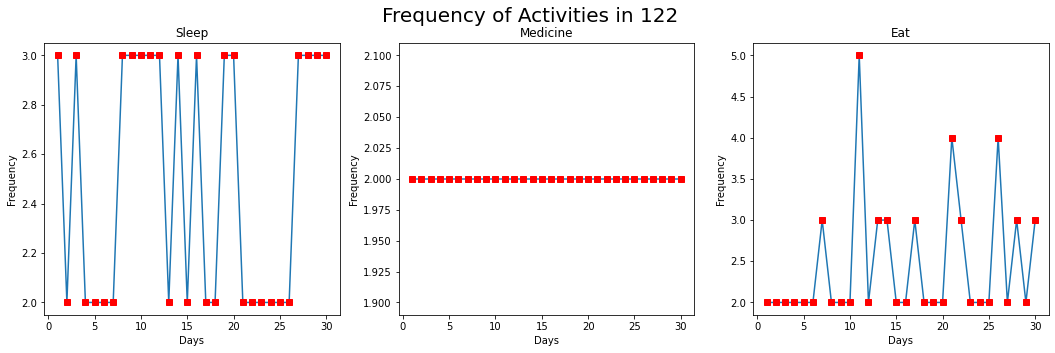

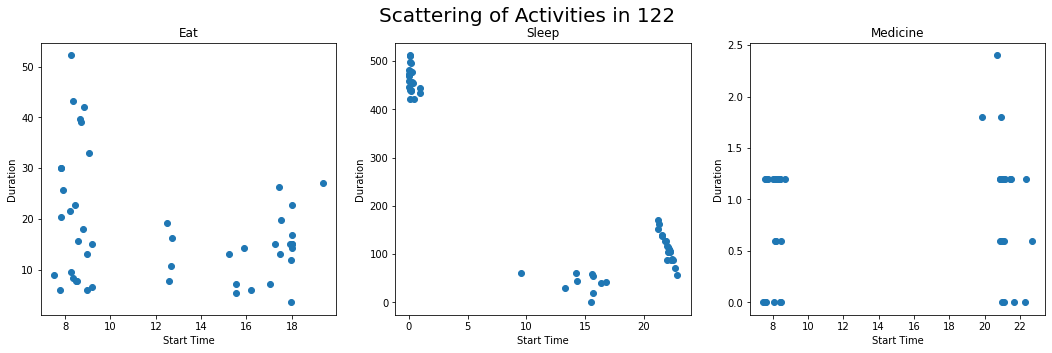

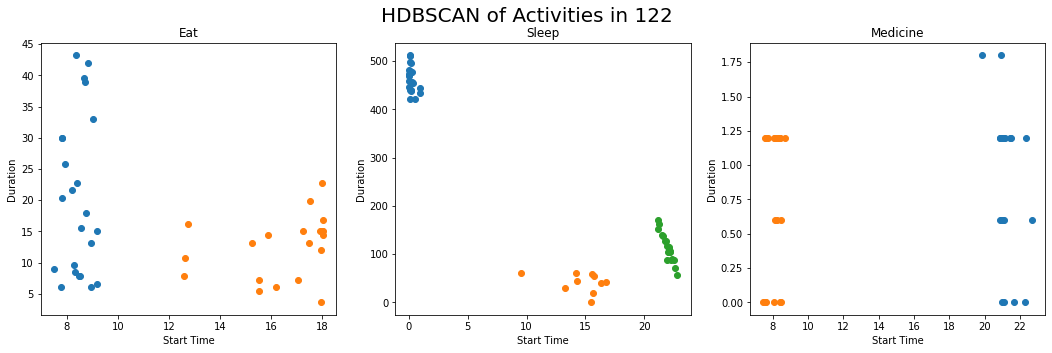

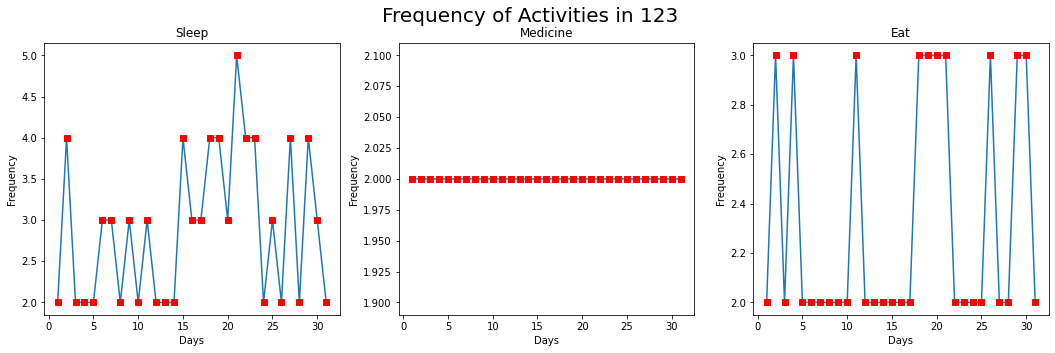

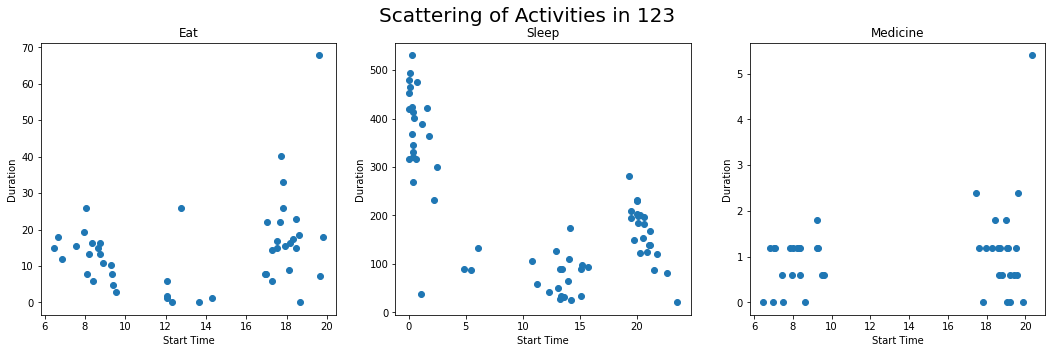

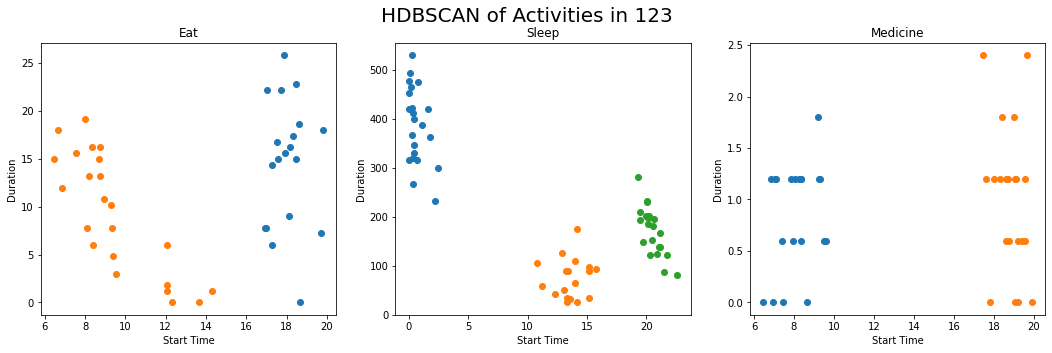

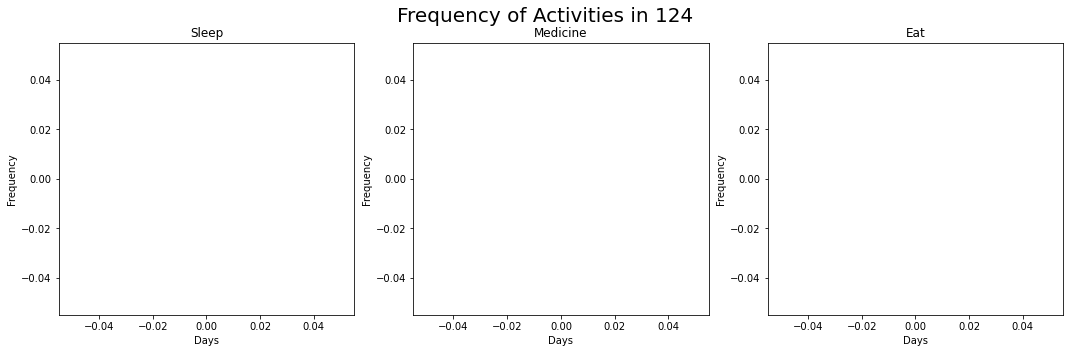

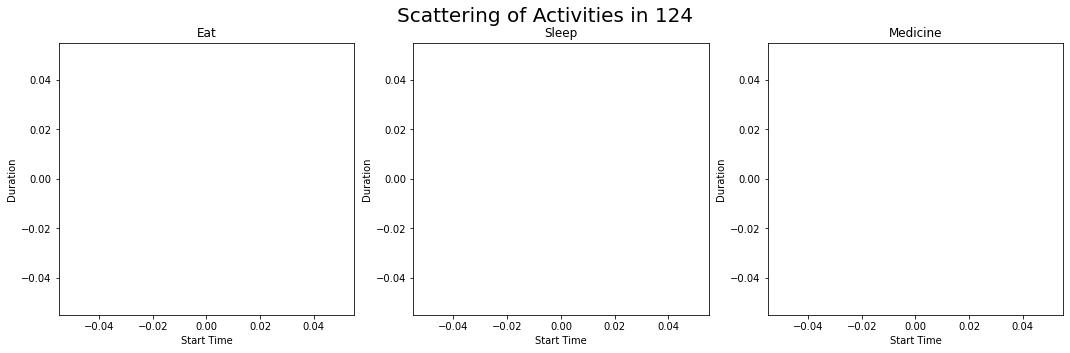

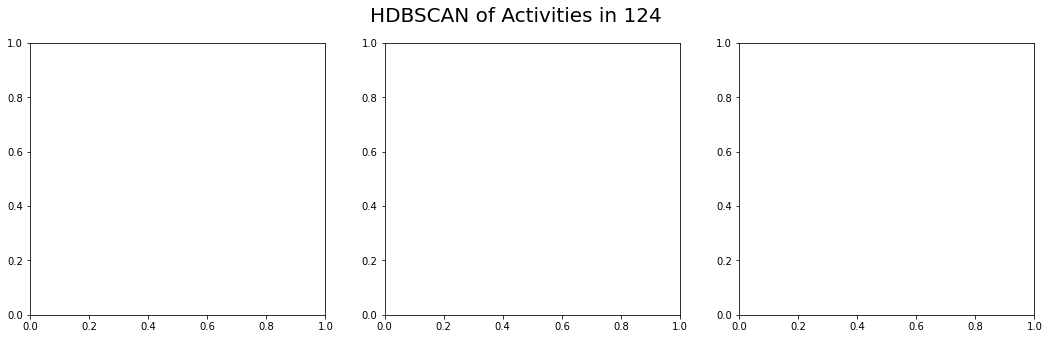

In [14]:

for d in [str(x) for x in range(101, 131)]:
    
    try:
        frequency_chart(d, 'filling')
    except:
        print('Error in Frequency chart of', d)
    
    try:
        clustering(d)
    except:
        print('Error in Scatter chart of', d)
    
    try:
        plot_clusters(d)
    except:
        print('Error in Clustering chart of', d)